# Logistic Regression

[PPT](https://notability.com/n/0XviO8aBpEaOckAZREJDrH)


The Hypothesis function for logistic regression is:

$$h_\theta(x) = \sigma(w^T x + b)$$

where $\sigma$ is the sigmoid function:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$


$$ z\rightarrow \infty \rightarrow \sigma(z) \rightarrow 1$$
$$ z\rightarrow -\infty \rightarrow \sigma(z) \rightarrow 0$$

**Interpretation of the hypothesis**:

$$h_\theta(x) = P(y = 1 | x; \theta)$$

is the probability that $y = 1$ given $x$ and parameters $\theta$.


which is, 

$$P(y = 1 | x; \theta) + P(y = 0 | x; \theta) = 1$$


So, now we need to come up with a cost function which is convex and differentiable. So that we can use gradient descent to find the optimal parameters $\theta$.


$$ 
Cost(h(x), y) = 
\begin{cases} 
    -log(h(x)), & \text{if } y = 1 \\
    -log(1 - h(x)),& \text{if } y = 0
\end{cases} $$







The reason why we use log-loss is because it is continous and differentiable. It is very easy to optimize.







In [1]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

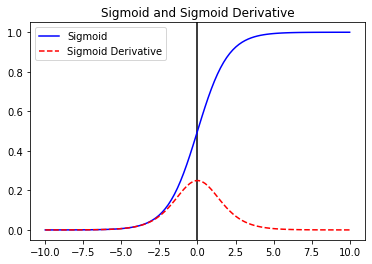

In [8]:
# Plot sigmoid function

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


x = np.linspace(-10, 10, 100)

plt.axvline(x=0, color='k')
plt.plot(x, sigmoid(x), 'b', label='Sigmoid')
plt.plot(x, sigmoid_derivative(x), 'r', label='Sigmoid Derivative', linestyle='--')
plt.legend(loc='best')
plt.title('Sigmoid and Sigmoid Derivative')
plt.show()

In [17]:
# Sigmoid as an OR gate

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# OR gate
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])

# Initialize weights
w = np.random.rand(2, 1)
b = np.random.rand(1)

# Learning rate
lr = 0.1



0.6224593312018546

In [39]:
# OR gate


# When x = [0,0], regardless of the weights, the bias should be negative, so that z < 0 and sigmoid(z) < 0.5 -> y = 0
# b = -1
# When x = [1, 0], w1 = 2 so that z = 2x1 + 0x2 + b = 2 + b -> z > 0 and sigmoid(z) > 0.5 -> y = 1
# w1 = 2


x= [0, 0]
y= [0]
w= [[1],
    [1]]
b= [-1]

# Forward propagation
z = np.dot(x, w) + b
a = sigmoid(z)

print(a[0])

if a<0.5:
    print("Negative")
else:
    print("Positive")


0.2689414213699951
Negative


In [50]:
# OR Gate
# So, the weights of the OR gate are w1 = 2 and w2 = 2 and the bias is b = -1. 


x= [[0, 0],
    [0, 1],
    [1, 0],
    [1, 1]]

w= [[2],
    [2]]
b= [-1]

z = np.dot(x, w) + b
a = sigmoid(z)

a  = a > 0.5 # Convert to boolean
a.flatten() # Convert to 1D array


array([False,  True,  True,  True])

In [51]:
# NOR Gate
# So, the weights of the NOR gate are w1 = -2 and w2 = -2 and the bias is b = 1. (Note the sign change of the weights from the OR gate)

x= [[0, 0],
    [0, 1],
    [1, 0],
    [1, 1]]


w= [[-2],
    [-2]]
b= [1]

z = np.dot(x, w) + b
a = sigmoid(z)

a  = a > 0.5 # Convert to boolean
a.flatten() # Convert to 1D array


array([ True, False, False, False])

In [59]:
# AND Gate
# So, the weights of the AND gate are w1 = 2 and w2 = 2 and the bias is b = -2. 

# Change the signs of the weights and the bias from AND gate to get NAND gate

x= [[0, 0],
    [0, 1],
    [1, 0],
    [1, 1]]


w= [[2],
    [2]]
b= [-3]


z = np.dot(x, w) + b
a = sigmoid(z)

a  = a > 0.5 # Convert to boolean
a.flatten() 


array([False, False, False,  True])